In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_palette("Set2")

pd.set_option("display.max_columns", None)


In [5]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape


(7043, 21)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [17]:
df["TotalCharges"].isnull().sum()


11

In [19]:
df[df["TotalCharges"].isnull()][["tenure", "MonthlyCharges", "TotalCharges"]]


,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [21]:
df["TotalCharges"].fillna(0, inplace=True)


C:\Users\Shrawani\AppData\Local\Temp\ipykernel_5588\609585636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(0, inplace=True)


In [23]:
df.duplicated().sum()


0

In [25]:
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})


In [27]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})


In [29]:
def tenure_group(tenure):
    if tenure <= 12:
        return "0-1 year"
    elif tenure <= 24:
        return "1-2 years"
    elif tenure <= 36:
        return "2-3 years"
    elif tenure <= 48:
        return "3-4 years"
    elif tenure <= 60:
        return "4-5 years"
    else:
        return "5+ years"

df["TenureGroup"] = df["tenure"].apply(tenure_group)


In [31]:
services = [
    "PhoneService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]

df["ServiceCount"] = df[services].apply(
    lambda x: sum(x == "Yes"), axis=1
)


In [33]:
df["Estimated_CLV"] = df["MonthlyCharges"] * df["tenure"]


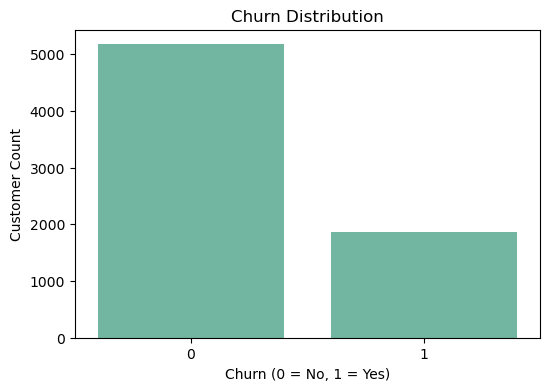

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Customer Count")
plt.show()


In [37]:
churn_rate = df["Churn"].mean() * 100
churn_rate


26.536987079369588

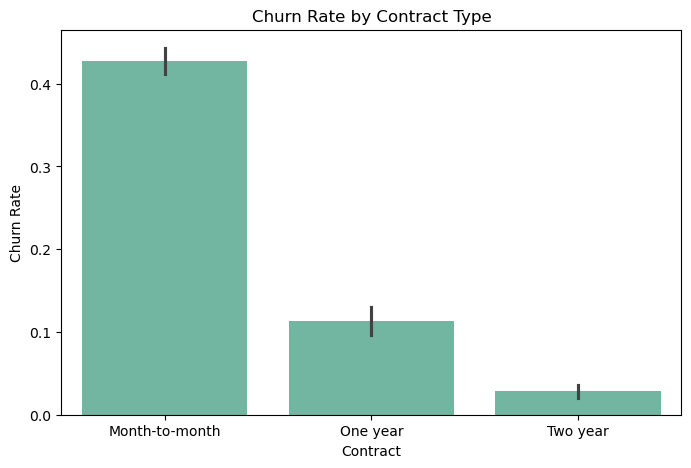

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(x="Contract", y="Churn", data=df)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()


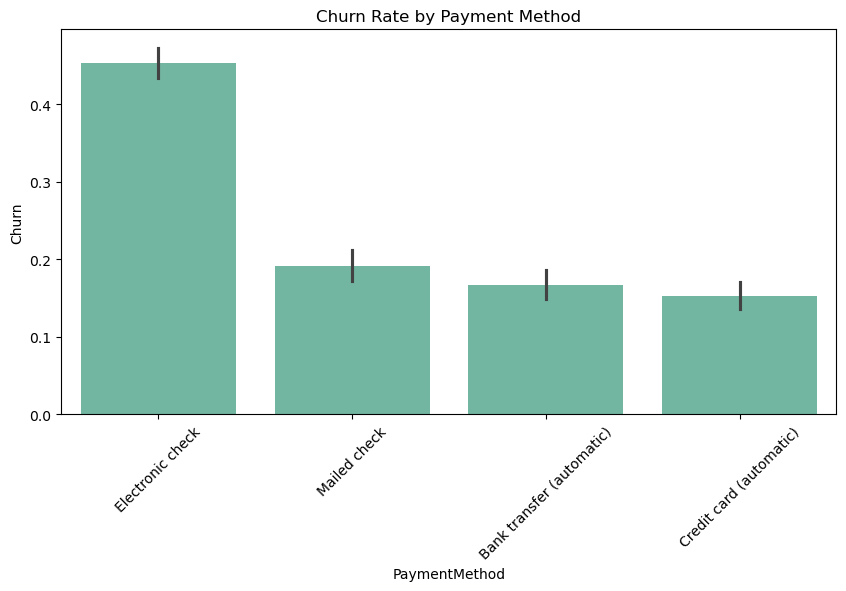

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x="PaymentMethod", y="Churn", data=df)
plt.xticks(rotation=45)
plt.title("Churn Rate by Payment Method")
plt.show()


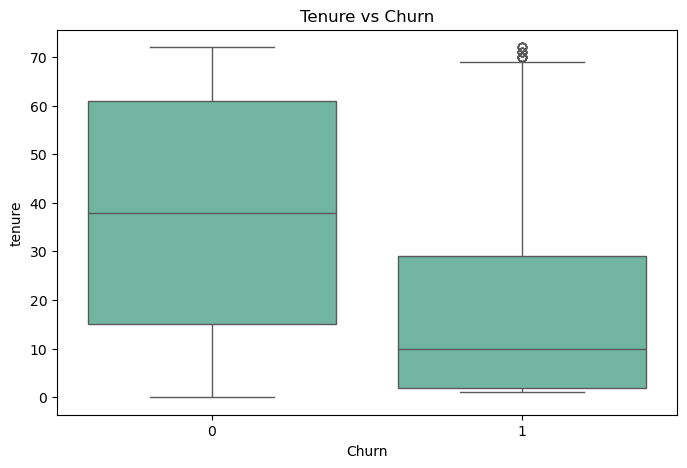

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


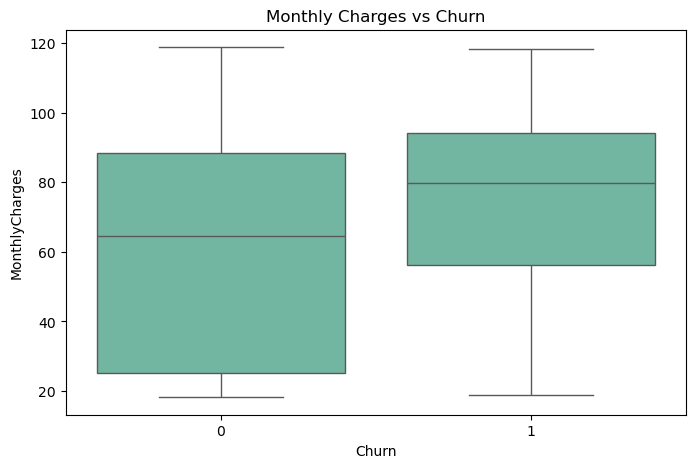

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


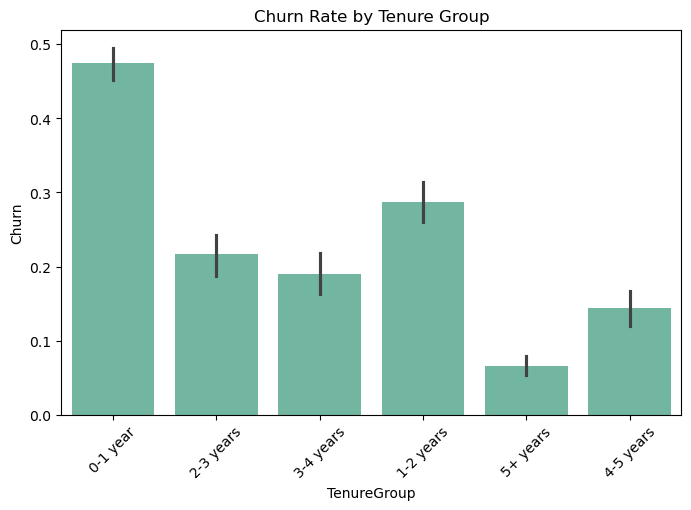

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x="TenureGroup", y="Churn", data=df)
plt.title("Churn Rate by Tenure Group")
plt.xticks(rotation=45)
plt.show()


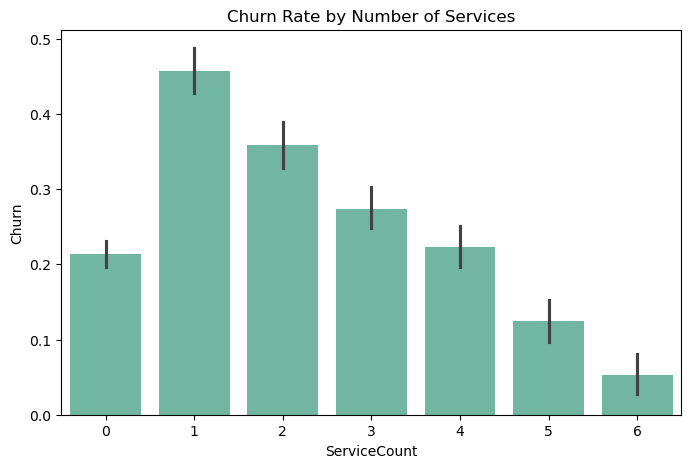

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(x="ServiceCount", y="Churn", data=df)
plt.title("Churn Rate by Number of Services")
plt.show()


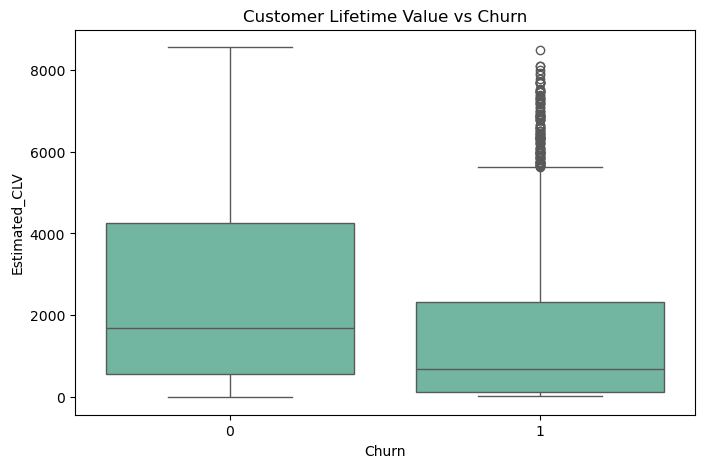

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Estimated_CLV", data=df)
plt.title("Customer Lifetime Value vs Churn")
plt.show()


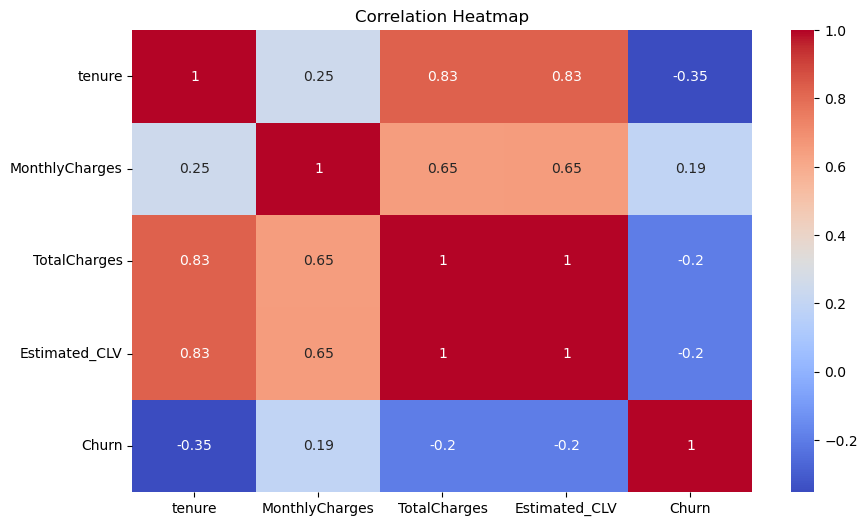

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df[["tenure", "MonthlyCharges", "TotalCharges", "Estimated_CLV", "Churn"]].corr(),
    annot=True, cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()


In [59]:
df.to_csv("Telco_Churn_Cleaned_For_PowerBI.csv", index=False)
